In [1]:
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from yaml import safe_load

In [2]:
def map_nice_date_names(df):
    df = df.copy()
    split_date_map = {"1_1_2016" : "Train: [2013-2016], Test: [2016-2017]",
                  "1_1_2017" : "Train: [2013-2017], Test: [2017-2018]",
                  "1_1_2018" : "Train: [2013-2018], Test: [2018-2019]",
                  "1_1_2019" : "Train: [2013-2019], Test: [2019-2020]"}

    df["Train/test split"] = df["split_date"].map(split_date_map)
    return df

def map_nice_model_names(df):
    df = df.copy()
    
    name_map = {'DummyRegressorModel': 'Mean',
         'DecisionTreeRegressorModel': 'Decision tree (None, 2)',
         'PytorchRegressorModel': 'Neural network (2, 128)',
         'ExtraTreeRegressorModel': 'Extremely randomized trees (None, 2)',
         'PytorchLinearRegressionModel': 'Linear regression',
         'PytorchDeepDeepDeepRegressorModel': 'Neural network (5, 128)',
         'PytorchWideDeepDeepDeepRegressorModel': 'Neural network (5, 256)',
         'PytorchWideWideDeepDeepDeepRegressorModel': 'Neural network (5, 512)',
         'PytorchWideWideRegressorModel': 'Neural network (2, 512)',
         'PytorchWideWideShallowRegressorModel': 'Neural network (1, 512)',
         'PytorchWideWideDeepRegressorModel': 'Neural network (3, 512)',
         'PytorchWideWideDeepDeepRegressorModel': 'Neural network (4, 512)',
         'PytorchShallowRegressorModel': 'Neural network (1, 128)',
         'PytorchDeepRegressorModel': 'Neural network (3, 128)',
         'PytorchWideRegressorModel': 'Neural network (2, 256)',
         'PytorchWideShallowRegressorModel': 'Neural network (1, 256)',
         'PytorchWideDeepRegressorModel': 'Neural network (3, 256)',
         'PytorchWideDeepDeepRegressorModel': 'Neural network (4, 256)',
         'PytorchDeepDeepRegressorModel': 'Neural network (4, 128)'}
    
    df['model_name'] = df['model_name'].map(name_map)
    return df

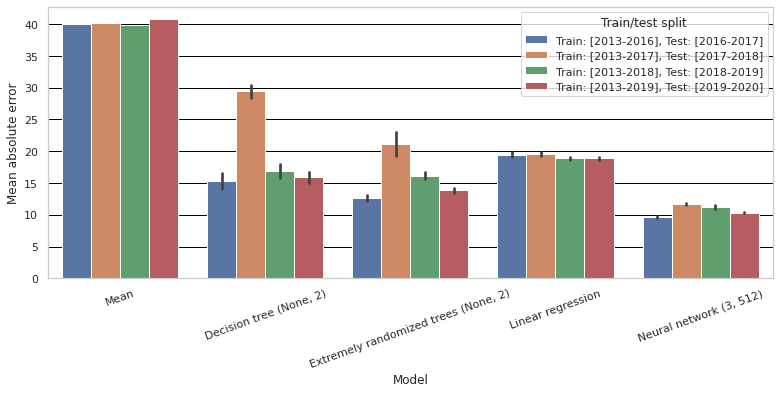

In [3]:
show_list = [
    'DummyRegressorModel',
    'DecisionTreeRegressorModel',
    'ExtraTreeRegressorModel',
    'PytorchLinearRegressionModel',
    'PytorchWideWideDeepRegressorModel',
]



sns.set_theme(style="whitegrid")



with open('../models/test_metrics/summary.yaml', 'r') as f:
    df = pd.json_normalize(safe_load(f))
    df = df.query('model_name in @show_list')
    
    df['model_name_sort'] = df['model_name'].map(lambda e: show_list.index(e))
    
    df = df.sort_values(by=["model_name_sort", "split_date"])
    
    df = df.pipe(map_nice_date_names).pipe(map_nice_model_names)
    
    plt.figure(figsize=(13, 5))
    
    g = sns.barplot(x="model_name", y="MAE", hue="Train/test split", data=df, ci='sd')
    
    plt.xticks(rotation=20)
    plt.grid(axis='y', color='black')
    
    plt.xlabel("Model")
    plt.ylabel("Mean absolute error")
    
    plt.savefig('test_metrics_summary.pdf', bbox_inches='tight', pad_inches=0)

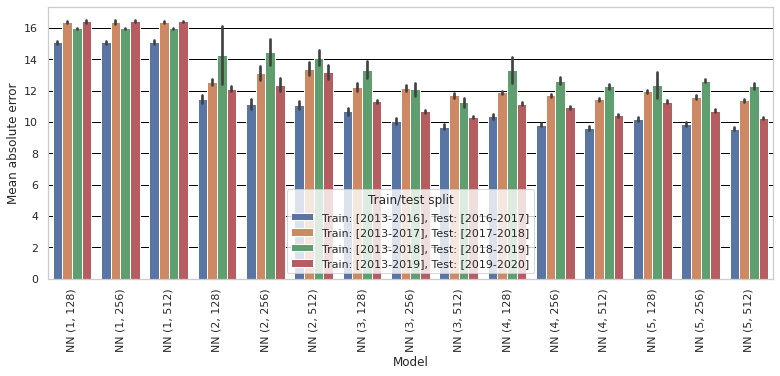

In [4]:
def map_nice_model_names(df):
    df = df.copy()
    
    name_map = {'DummyRegressorModel': 'Mean',
         'DecisionTreeRegressorModel': 'Decision tree (None, 2)',
         'PytorchRegressorModel': 'NN (2, 128)',
         'ExtraTreeRegressorModel': 'Extremely randomized trees (None, 2)',
         'PytorchLinearRegressionModel': 'Linear regression',
         'PytorchDeepDeepDeepRegressorModel': 'NN (5, 128)',
         'PytorchWideDeepDeepDeepRegressorModel': 'NN (5, 256)',
         'PytorchWideWideDeepDeepDeepRegressorModel': 'NN (5, 512)',
         'PytorchWideWideRegressorModel': 'NN (2, 512)',
         'PytorchWideWideShallowRegressorModel': 'NN (1, 512)',
         'PytorchWideWideDeepRegressorModel': 'NN (3, 512)',
         'PytorchWideWideDeepDeepRegressorModel': 'NN (4, 512)',
         'PytorchShallowRegressorModel': 'NN (1, 128)',
         'PytorchDeepRegressorModel': 'NN (3, 128)',
         'PytorchWideRegressorModel': 'NN (2, 256)',
         'PytorchWideShallowRegressorModel': 'NN (1, 256)',
         'PytorchWideDeepRegressorModel': 'NN (3, 256)',
         'PytorchWideDeepDeepRegressorModel': 'NN (4, 256)',
         'PytorchDeepDeepRegressorModel': 'NN (4, 128)'}
    
    df['model_name'] = df['model_name'].map(name_map)
    return df

sns.set_theme(style="whitegrid")

show_list = [
    'PytorchShallowRegressorModel',
    'PytorchWideShallowRegressorModel',
    'PytorchWideWideShallowRegressorModel',
    'PytorchRegressorModel',
    'PytorchWideRegressorModel',
    'PytorchWideWideRegressorModel',
    'PytorchDeepRegressorModel',
    'PytorchWideDeepRegressorModel',
    'PytorchWideWideDeepRegressorModel',
    'PytorchDeepDeepRegressorModel',
    'PytorchWideDeepDeepRegressorModel',
    'PytorchWideWideDeepDeepRegressorModel',
    'PytorchDeepDeepDeepRegressorModel',
    'PytorchWideDeepDeepDeepRegressorModel',
    'PytorchWideWideDeepDeepDeepRegressorModel',
]

with open('../models/test_metrics/summary.yaml', 'r') as f:
    df = pd.json_normalize(safe_load(f))
    df = df.query('model_name in @show_list')
    
    df['model_name_sort'] = df['model_name'].map(lambda e: show_list.index(e))
    
    df = df.sort_values(by=["model_name_sort", "split_date"])
    
    df = df.pipe(map_nice_date_names).pipe(map_nice_model_names)
    
    plt.figure(figsize=(13, 5))
    
    g = sns.barplot(x="model_name", y="MAE", hue="Train/test split", data=df, ci='sd')
    
    plt.xticks(rotation=90)
    plt.grid(axis='y', color='black')
    
    plt.xlabel("Model")
    plt.ylabel("Mean absolute error")
    
    plt.savefig('test_metrics_summary_nnets.pdf', bbox_inches='tight', pad_inches=0)
    
#df